In [226]:
import numpy  as np
import pandas as pd
import csv
import os
import glob
import pathlib
from matplotlib import pyplot as plt

In [34]:
path = os.getcwd()
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged = pd.concat(df_from_each_file)
df_merged.to_csv( "merged.csv")


In [35]:
df = pd.read_csv('merged.csv', na_values=['.'])

In [532]:
del df['Unnamed: 0']

In [533]:
df.dtypes

Kanton     object
Stadt      object
1850      float64
1860      float64
1870      float64
1880      float64
1890      float64
1900      float64
1910      float64
1920      float64
1930      float64
1940      float64
1950      float64
1960      float64
1970      float64
1980      float64
1990      float64
2000      float64
dtype: object

In [42]:
df.columns = ['Kanton', 'Stadt', '1850','1860', '1870','1880','1890','1900','1910','1920','1930','1940','1950','1960','1970','1980','1990','2000']


In [43]:
excelFiles = ["AG-neu.csv","AI-neu.csv","AR-neu.csv","BE-neu.csv","BL-neu.csv","BS-neu.csv","FR-neu.csv","GE-neu.csv","GL-neu.csv","GR-neu.csv","JU-neu.csv","LU-neu.csv","NE-neu.csv","NW-neu.csv","OW-neu.csv","SG-neu.csv","SH-neu.csv","SO-neu.csv","SZ-neu.csv","TG-neu.csv","TI-neu.csv","UR-neu.csv","VD-neu.csv","VS-neu.csv","ZG-neu.csv","ZH-neu.csv"]

array_length = len(excelFiles)

for i in range(array_length):
    os.remove(excelFiles[i])
    print("removing"+excelFiles[i])

removingAG-neu.csv
removingAI-neu.csv
removingAR-neu.csv
removingBE-neu.csv
removingBL-neu.csv
removingBS-neu.csv
removingFR-neu.csv
removingGE-neu.csv
removingGL-neu.csv
removingGR-neu.csv
removingJU-neu.csv
removingLU-neu.csv
removingNE-neu.csv
removingNW-neu.csv
removingOW-neu.csv
removingSG-neu.csv
removingSH-neu.csv
removingSO-neu.csv
removingSZ-neu.csv
removingTG-neu.csv
removingTI-neu.csv
removingUR-neu.csv
removingVD-neu.csv
removingVS-neu.csv
removingZG-neu.csv
removingZH-neu.csv


In [44]:
df.dtypes

Kanton     object
Stadt      object
1850       object
1860       object
1870       object
1880       object
1890       object
1900       object
1910       object
1920       object
1930       object
1940       object
1950       object
1960       object
1970       object
1980       object
1990       object
2000      float64
dtype: object

In [45]:
df = df.astype('string')

In [46]:
df['1850'] = df['1850'].replace(['...'],'0')
df['1860'] = df['1860'].replace(['...'],'0')
df['1870'] = df['1870'].replace(['...'],'0')
df['1880'] = df['1880'].replace(['...'],'0')
df['1890'] = df['1890'].replace(['...'],'0')
df['1900'] = df['1900'].replace(['...'],'0')
df['1910'] = df['1910'].replace(['...'],'0')
df['1920'] = df['1920'].replace(['...'],'0')
df['1930'] = df['1930'].replace(['...'],'0')
df['1940'] = df['1940'].replace(['...'],'0')
df['1950'] = df['1950'].replace(['...'],'0')
df['1960'] = df['1960'].replace(['...'],'0')
df['1970'] = df['1970'].replace(['...'],'0')
df['1980'] = df['1980'].replace(['...'],'0')
df['1990'] = df['1990'].replace(['...'],'0')
df['2000'] = df['2000'].replace(['...'],'0')

In [47]:
df = df.astype({'1850':float})
df = df.astype({'1860':float})
df = df.astype({'1870':float})
df = df.astype({'1880':float})
df = df.astype({'1890':float})
df = df.astype({'1900':float})
df = df.astype({'1910':float})
df = df.astype({'1920':float})
df = df.astype({'1930':float})
df = df.astype({'1940':float})
df = df.astype({'1950':float})
df = df.astype({'1960':float})
df = df.astype({'1970':float})
df = df.astype({'1980':float})
df = df.astype({'1990':float})
df = df.astype({'2000':float}) 

In [49]:
df.to_csv('merged2.csv')

In [50]:
os.remove('merged.csv')

In [515]:
### Ab hier übersichtlich
df = pd.read_csv('merged2.csv', na_values=['.'])

In [419]:
del df['Unnamed: 0']

In [420]:
df.dtypes

Kanton     object
Stadt      object
1850      float64
1860      float64
1870      float64
1880      float64
1890      float64
1900      float64
1910      float64
1920      float64
1930      float64
1940      float64
1950      float64
1960      float64
1970      float64
1980      float64
1990      float64
2000      float64
dtype: object

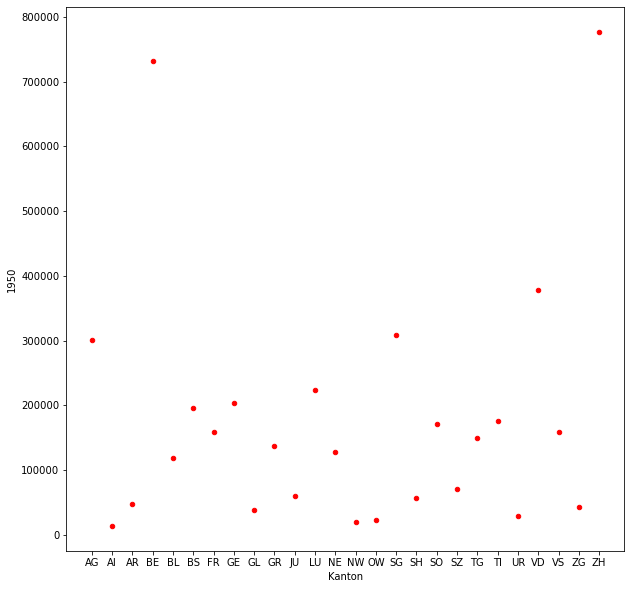

In [598]:
#Streuung
#Hier ist ersichtlich wie sich die Daten Streuen pro Jahr verteilt. Es wird die Summe der Einwohner pro Kanton pro jeweiliges Jahr abgebildet.
#Zu bedenken gilt, dass hier aus übersichtlichkeitsgründen nicht die einzelnen städte verwendet wurden.
#Wir sehen dass BE bereits zu beginn als Ausreisser bezeichnet werden kann. Im Verlauf der Jahre sieht man auch dass Zürich als Wohnort sehr beliebt wurde,
#somit Zürich ebenfalls als ausreisser bezeichnet werden kann.

kantons = ["AG","AI","AR","BE","BL","BS","FR","GE","GL","GR","JU","LU","NE","NW","OW","SG","SH","SO","SZ","TG","TI","UR","VD","VS","ZG","ZH"]
    
def scatterYearsWithKanton(year,wannaPlot):
    
    data = {'Kanton': [],
        '1850': []
        }

    df2 = pd.DataFrame(data)
    
    for i in kantons:
        x = df.loc[df['Kanton'] == i, year].sum()

        dfLoop= pd.DataFrame({"Kanton":[i],
                              year:[x]})
        
        df2 = df2.append(dfLoop)

    if(wannaPlot):
        df2.plot(kind='scatter', x='Kanton', y=year ,color='red',figsize=(10,10))
    
scatterYearsWithKanton('1950',True)

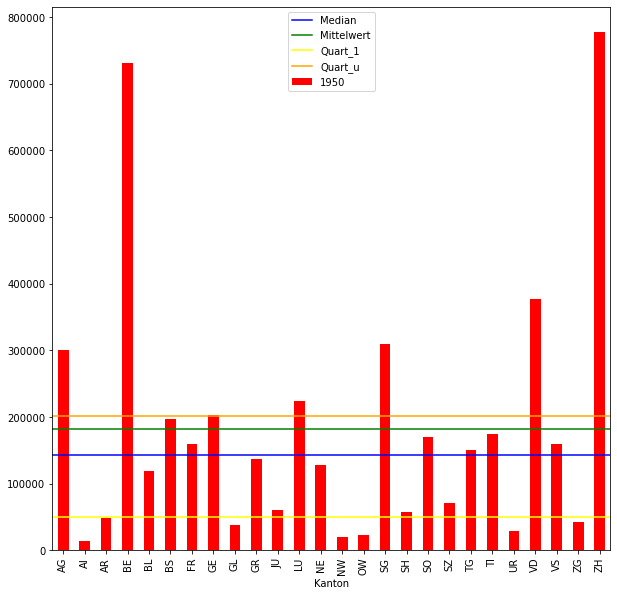

In [599]:
#Hier die gleiche Ansicht wie beim Scatter plot nur als "Bar" Ausserdem Median,Mittelwert,Quantile eingetragen.
#Hier kann man ein Jahr auswählen und ersichtlich ist ein Plot mit Jahr sowie jeweiligen Kantonen

#kantons = ["AG","AI","AR","BE","BL","BS","FR","GE","GL","GR","JU","LU","NE","NW","OW","SG","SH","SO","SZ","TG","TI","UR","VD","VS","ZG","ZH"]

def BarYearsWithKanton(year,wannaPlot):
    
    data = {'Kanton': [],
        year: []}

    df2 = pd.DataFrame(data)
    
    for i in kantons:
        x = df.loc[df['Kanton'] == i, year].sum()

        dfLoop= pd.DataFrame({"Kanton":[i],
                              year:[x]})
        df2 = df2.append(dfLoop)
        
    median = df2[year].median()
    mittelwert = df2[year].mean()
    quart_1, quart_u = np.percentile(df2[year],[25,75])
    
        
    if(wannaPlot):
        df2.plot(kind='bar', x='Kanton', y=year ,color='red',figsize=(10,10))
        plt.axhline(y = median, color = 'b', linestyle = '-',label="Median")    
        plt.axhline(y = mittelwert, color = 'g', linestyle = '-',label="Mittelwert")
        plt.axhline(y = quart_1, color = 'yellow', linestyle = '-',label="Quart_1")
        plt.axhline(y = quart_u, color = 'orange', linestyle = '-',label="Quart_u")
        
        plt.legend(loc='best')
        plt.show()
        
BarYearsWithKanton('1950',True)

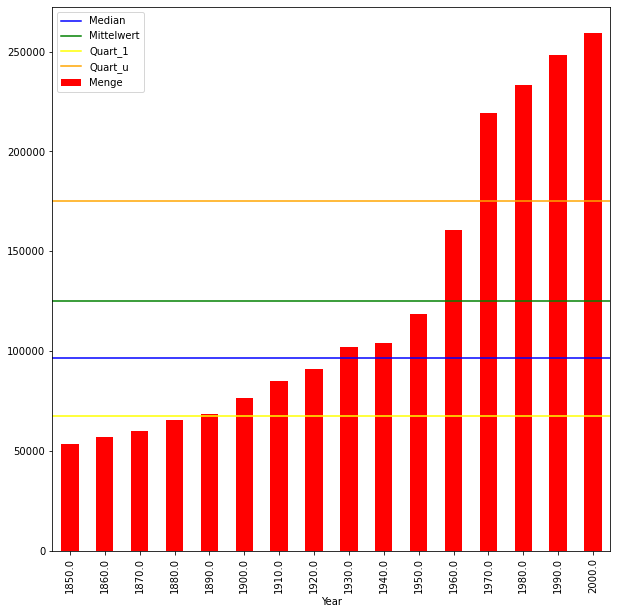

In [600]:
#Form
#Hier ersichtlich dass die meisten Kantone Linksschief sind. Man kann einen Kanton eingeben und man sieht die entwicklung des eingegebenen Kantons
#pro Jahr.

years = ["1850","1860","1870", "1880","1890","1900","1910","1920","1930","1940","1950","1960","1970","1980","1990","2000"]
#kantons = ["AG","AI","AR","BE","BL","BS","FR","GE","GL","GR","JU","LU","NE","NW","OW","SG","SH","SO","SZ","TG","TI","UR","VD","VS","ZG","ZH"]

def form(kanton,wannaPlot):
    
    data = {'Menge': [],
            'Year': [],
            'Kanton': []
           }

    df2 = pd.DataFrame(data)
    
    for i in years:
        x = df.loc[df['Kanton'] == kanton, i].sum()
        
        dfLoop= pd.DataFrame({"Year":[i],
                              'Menge':[x],
                              'Kanton': kanton})

        df2 = df2.append(dfLoop)
        
    df2 = df2.astype({'Year':float})
    
    
    median = df2['Menge'].median()
    mittelwert = df2['Menge'].mean()
    quart_1, quart_u = np.percentile(df2['Menge'],[25,75])
    
    
    if(wannaPlot):
        df2.plot(kind='bar', x='Year', y='Menge' ,color='red',figsize=(10,10))
        plt.axhline(y = median, color = 'b', linestyle = '-',label="Median")    
        plt.axhline(y = mittelwert, color = 'g', linestyle = '-',label="Mittelwert")
        plt.axhline(y = quart_1, color = 'yellow', linestyle = '-',label="Quart_1")
        plt.axhline(y = quart_u, color = 'orange', linestyle = '-',label="Quart_u")
        
        plt.legend(loc='best')
        plt.show()
    
form('BL',True)


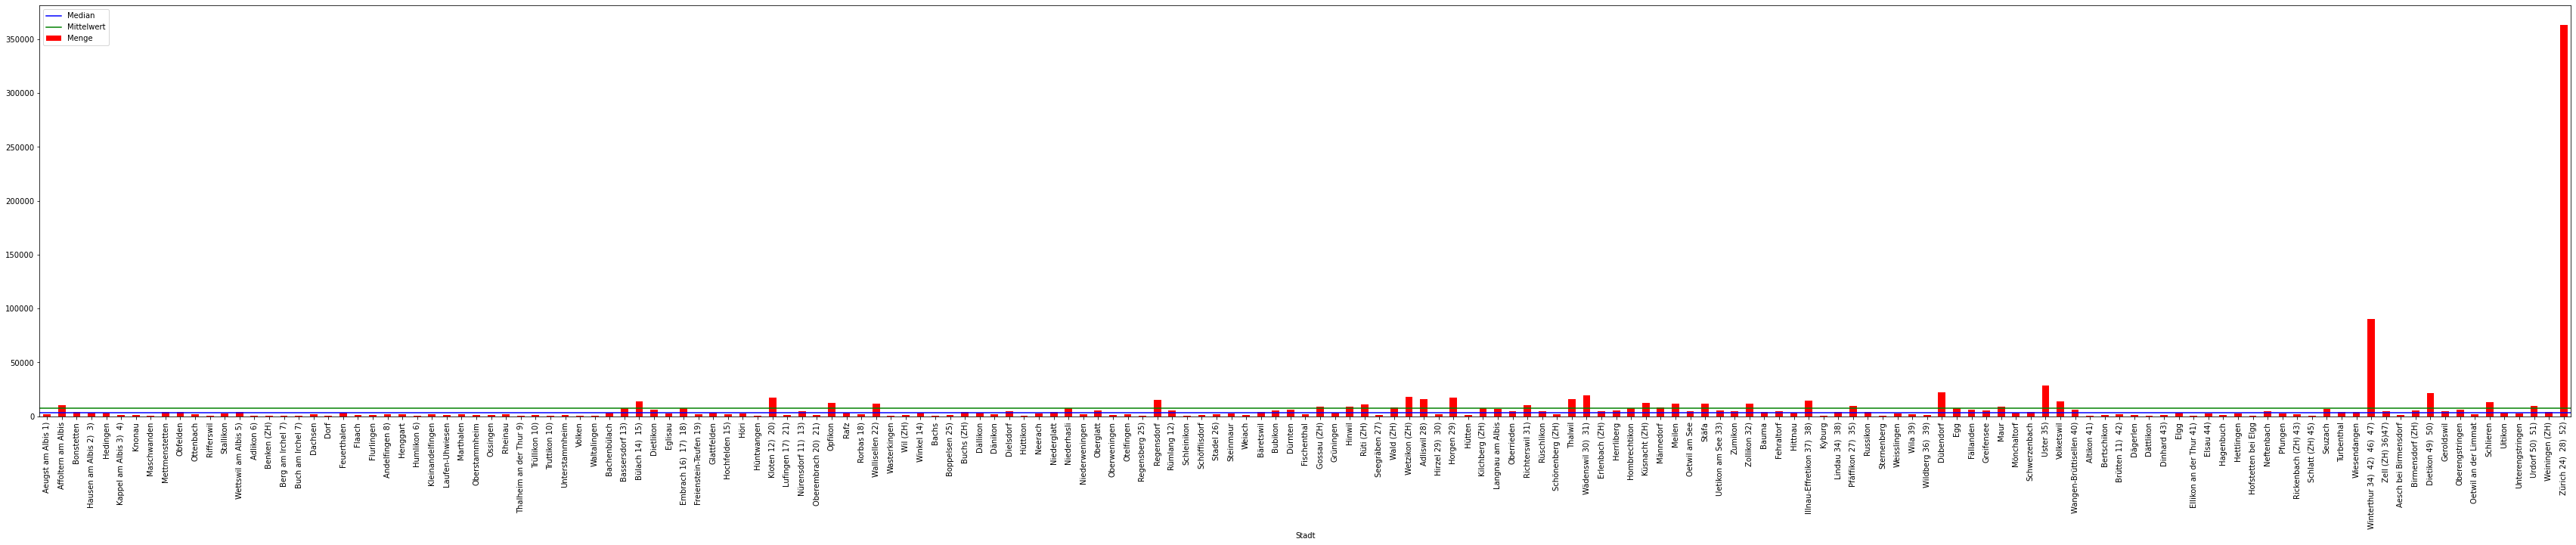

In [603]:
#Hier kann man ein Jahr und Kanton eingeben und ersichtlich ist ein Plot der jeweiligen Staedte des eingegebenen Kantons. Sehenswert ist Zürich!

#kantons = ["AG","AI","AR","BE","BL","BS","FR","GE","GL","GR","JU","LU","NE","NW","OW","SG","SH","SO","SZ","TG","TI","UR","VD","VS","ZG","ZH"]
#years = ["1850","1860","1870", "1880","1890","1900","1910","1920","1930","1940","1950","1960","1970","1980","1990","2000"]

def BarYearsWithStaedte(year,kanton,wannaPlot):
    y = df.loc[(df['Kanton'] == kanton)]
    staedte = y.Stadt.unique()
    
    data = {'Menge': [],
            'Stadt': [],
            'Year': [],
           }
    
    df2 = pd.DataFrame(data)
    
    for i in staedte:
        x = df.loc[(df['Kanton'] == kanton) & (df['Stadt'] == i) , year].sum()
        
        dfLoop= pd.DataFrame({"Year":[year],
                              'Menge':[x],
                              'Stadt': [i],
                             })
        df2 = df2.append(dfLoop)
        
    median = df2['Menge'].median()
    mittelwert = df2['Menge'].mean()
        
    if(wannaPlot):
        df2.plot(kind='bar', x='Stadt', y='Menge' ,color='red',figsize=(60,10))
        plt.axhline(y = median, color = 'b', linestyle = '-',label="Median")    
        plt.axhline(y = mittelwert, color = 'g', linestyle = '-',label="Mittelwert")
        plt.legend(loc='best')
        plt.show()
        
BarYearsWithStaedte('2000','ZH' ,True)